# Exercises I - Required (continued)
Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named explore.ipynb. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from env import host, user, password

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

import os
os.path.isfile('telco_df.csv')

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import sklearn.preprocessing
from sklearn.preprocessing import QuantileTransformer

import acquire
import wrangle
import prepare
import explore

#7. In a seperate notebook, use the functions you have developed in this exercise with the mall customers dataset.

In [3]:
#acquiring mall data
mall_customers_df= acquire.get_mall_data()

In [4]:
mall_customers_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#looking at datatypes in dataframe
mall_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#quick stats
mall_customers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [18]:
#Using this function to plot pairwise relationships
def plot_variable_pairs(ds):
    '''
    This function takes in the telco train dataset and returns 2 lmplots (scatterplots with a regression line). 
    The first plot shows the relationship between age and annual income . 
    The second plot shows the relationship between spending score and annual income.
    '''
    #lmplot of tenure with total_charges with tenure
    sns.lmplot(x="age", y="annual_income", data=ds, line_kws={'color': 'purple'})
    plt.show()
    #lmplot of tenure with total_charges with monthly_charges
    sns.lmplot(x="spending_score", y="annual_income", data=ds, line_kws={'color': 'purple'})
    plt.show();
    

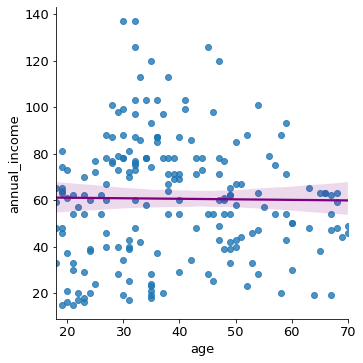

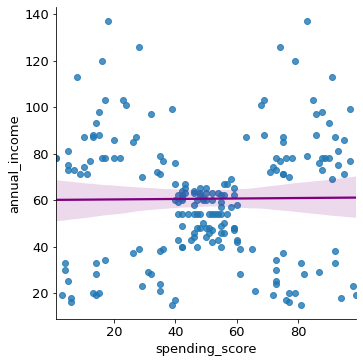

In [19]:
plot_variable_pairs(mall_customers_df)

In [11]:
cat_vars= ['gender']
cont_vars= ['age', 'annual_income', 'spending_score']

In [14]:
#Another function to plot pairwise relationships
def plot_quant(ds, cont_vars):
    '''
    This function takes in the train dataset, and continuous variable column list
    and ouputs the list as a plot.
    arguments: 
    - ds= dataset you want to input (typically the train dataset)
    - cont_vars= continuous variable list of columns
    '''
    for col in list(ds.columns):
            
            if col in cont_vars:
                sns.barplot(data = ds, y = col)
                plt.show()

def plot_cat(ds, cat_vars):
    '''
    This function takes in the train dataset, and categorical variable column list
    and ouputs the list as a plot.
    arguments: 
    - ds= dataset you want to input (typically the train dataset)
    - cat_vars= categorical variable list of columns
    '''
    for col in list(ds.columns):
        if col in cat_vars:
            sns.countplot(ds[col])
            plt.show()
            
            

def plot_categorical_and_continuous_vars(ds, cat_vars, cont_vars):
    
    '''
    This function takes in the train dataset, categorical variable column list, and continuous variable column list
    and ouputs the lists as plots.
    arguments: 
    - ds= dataset you want to input (typically the train dataset)
    - cat_vars= categorical variable list of columns
    - cont_vars= continuous variable list of columns
    '''
    
    plot_cat(ds, cat_vars)
    
    plot_quant(ds, cont_vars);
    
    

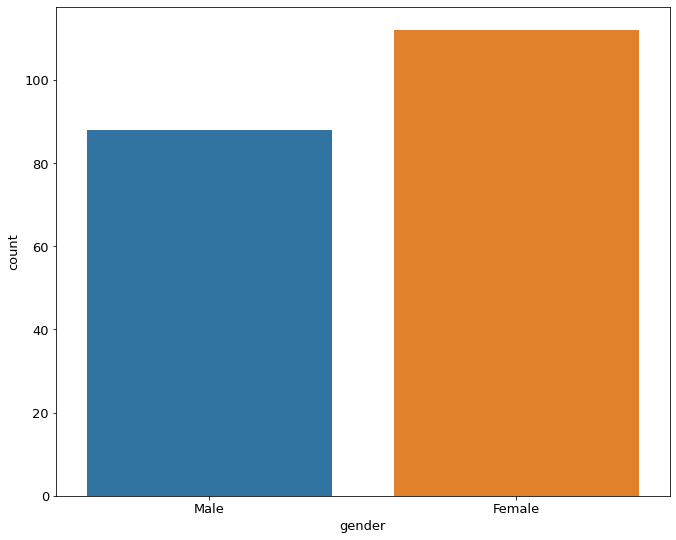

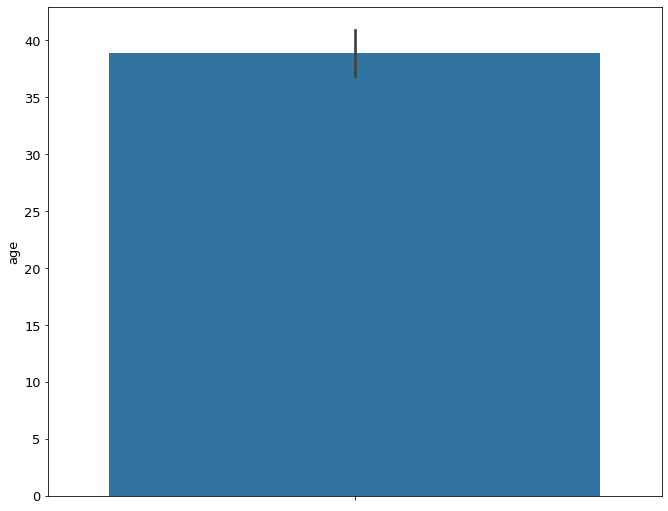

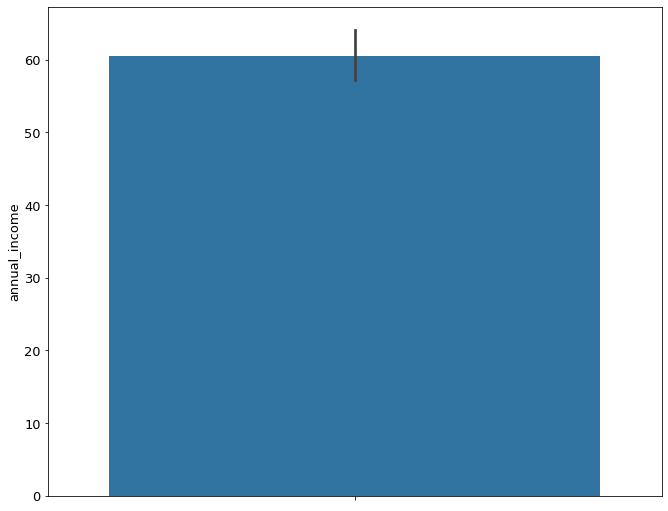

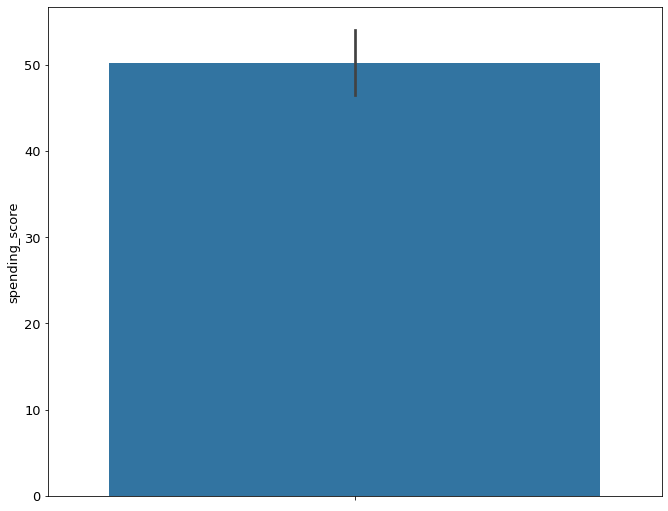

In [15]:
plot_categorical_and_continuous_vars(mall_customers_df, cat_vars, cont_vars)

In [66]:
def plot_quant2(ds, cont_vars):
    '''
    This function takes in the train dataset, and continuous variable column list
    and ouputs the list as a plot.
    arguments: 
    - ds= dataset you want to input (typically the train dataset)
    - cont_vars= continuous variable list of columns
    '''
    for col in list(ds.columns):
            
            if col in cont_vars:
                sns.displot(x=col, data=ds, color= 'mediumorchid', edgecolor='pink')
                plt.show()

def plot_cat2(ds, cat_vars):
    '''
    This function takes in the train dataset, and categorical variable column list
    and ouputs the list as a plot.
    arguments: 
    - ds= dataset you want to input (typically the train dataset)
    - cat_vars= categorical variable list of columns
    '''
    for col in list(ds.columns):
        if col in cat_vars:
            sns.countplot(ds[col], palette= 'mako')
            plt.show()
            
            

def plot_categorical_and_continuous_vars2(ds, cat_vars, cont_vars):
    
    '''
    This function takes in the train dataset, categorical variable column list, and continuous variable column list
    and ouputs the lists as plots.
    arguments: 
    - ds= dataset you want to input (typically the train dataset)
    - cat_vars= categorical variable list of columns
    - cont_vars= continuous variable list of columns
    '''
    
    plot_cat2(ds, cat_vars)
    
    plot_quant2(ds, cont_vars);
    
    

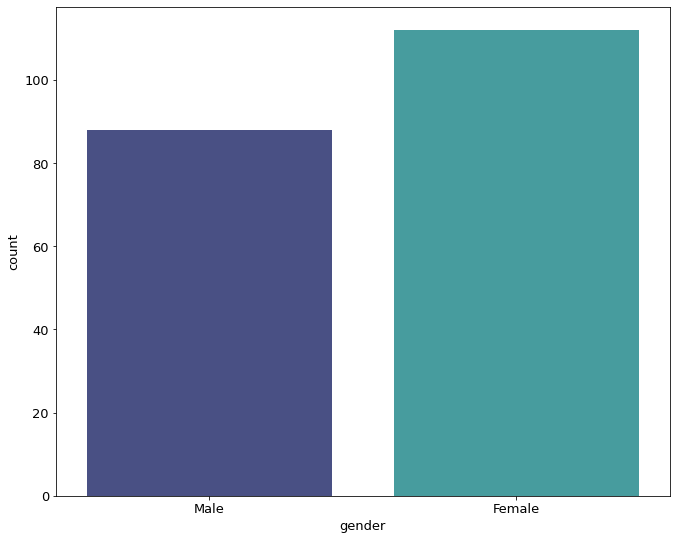

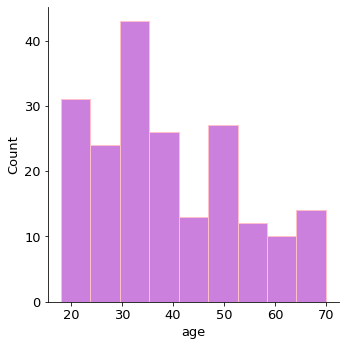

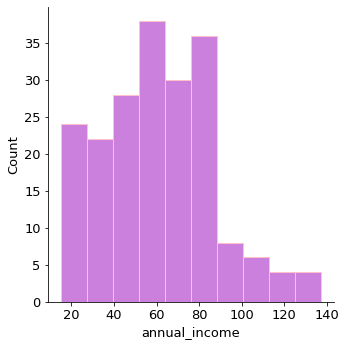

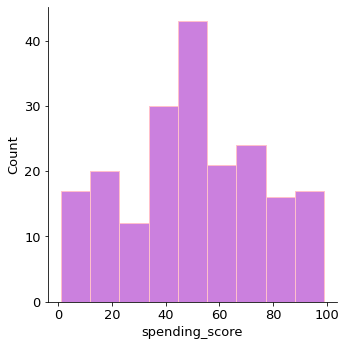

In [67]:
plot_categorical_and_continuous_vars2(mall_customers_df, cat_vars, cont_vars)